# Phase 2 – Customer Segmentation

**Objective:**  
Segment customers into meaningful groups based on behavior and value to:
- Understand customer profiles
- Support churn prediction
- Enable targeted retention strategies


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv(
    r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

# Fix TotalCharges again (safe practice)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
segmentation_df = data[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].copy()
segmentation_df.head()


,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,29.85
1,5575-GNVDE,34,56.95,1889.50
2,3668-QPYBK,2,53.85,108.15
3,7795-CFOCW,45,42.30,1840.75
4,9237-HQITU,2,70.70,151.65


In [4]:
# Average spend per month
segmentation_df['AvgMonthlySpend'] = segmentation_df['TotalCharges'] / (segmentation_df['tenure'] + 1)

segmentation_df.head()


,customerID,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
0,7590-VHVEG,1,29.85,29.85,14.925000
1,5575-GNVDE,34,56.95,1889.50,53.985714
2,3668-QPYBK,2,53.85,108.15,36.050000
3,7795-CFOCW,45,42.30,1840.75,40.016304
4,9237-HQITU,2,70.70,151.65,50.550000


In [7]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_df[features])
scaled_features[:5]


array([[-1.27744458, -1.16032292, -0.99261052, -1.44111462],
       [ 0.06632742, -0.25962894, -0.17216471, -0.16368448],
       [-1.23672422, -0.36266036, -0.9580659 , -0.75024882],
       [ 0.51425142, -0.74653546, -0.19367238, -0.62053597],
       [-1.23672422,  0.19736523, -0.93887444, -0.27604507]])

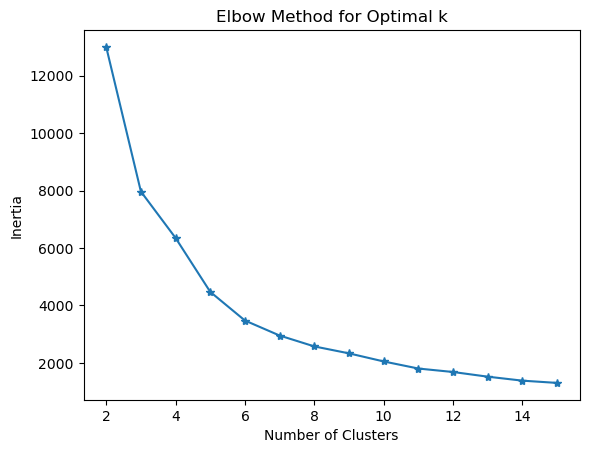

In [13]:
inertia = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 16), inertia, marker='*')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [14]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"k={k} → Silhouette Score: {score:.3f}")


k=2 → Silhouette Score: 0.458
k=3 → Silhouette Score: 0.443
k=4 → Silhouette Score: 0.400
k=5 → Silhouette Score: 0.418
k=6 → Silhouette Score: 0.436
k=7 → Silhouette Score: 0.419


In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
segmentation_df['Segment'] = kmeans.fit_predict(scaled_features)

segmentation_df.head(5000)


,customerID,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend,Segment
0,7590-VHVEG,1,29.85,29.85,14.925000,0
1,5575-GNVDE,34,56.95,1889.50,53.985714,3
2,3668-QPYBK,2,53.85,108.15,36.050000,2
3,7795-CFOCW,45,42.30,1840.75,40.016304,0
4,9237-HQITU,2,70.70,151.65,50.550000,2
...,...,...,...,...,...,...
4995,7912-SYRQT,7,75.10,552.95,69.118750,2
4996,3557-HTYWR,47,74.05,3496.30,72.839583,3
4997,4816-JBHOV,2,44.70,93.70,31.233333,0
4998,8920-NAVAY,62,110.75,7053.35,111.957937,1


In [21]:
segment_summary = segmentation_df.groupby('Segment')[features].mean()
segment_summary


,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
Segment,,,,
0,25.502448,27.195906,633.730418,22.566651
1,62.979511,99.507565,6256.107329,98.034316
2,10.610357,75.773881,789.516817,62.993840
3,45.293238,76.734753,3330.836996,74.814411


In [23]:
segment_labels = {
    0: 'Low Value Low Spend',
    1: 'High Value Loyal',
    2: 'New High Spend (At Risk)',
    3: 'Mid Value Stable'
}
segmentation_df['Segment_Label'] = segmentation_df['Segment'].map(segment_labels)
segmentation_df.head(5000)

,customerID,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend,Segment,Segment_Label
0,7590-VHVEG,1,29.85,29.85,14.925000,0,Low Value Low Spend
1,5575-GNVDE,34,56.95,1889.50,53.985714,3,Mid Value Stable
2,3668-QPYBK,2,53.85,108.15,36.050000,2,New High Spend (At Risk)
3,7795-CFOCW,45,42.30,1840.75,40.016304,0,Low Value Low Spend
4,9237-HQITU,2,70.70,151.65,50.550000,2,New High Spend (At Risk)
...,...,...,...,...,...,...,...
4995,7912-SYRQT,7,75.10,552.95,69.118750,2,New High Spend (At Risk)
4996,3557-HTYWR,47,74.05,3496.30,72.839583,3,Mid Value Stable
4997,4816-JBHOV,2,44.70,93.70,31.233333,0,Low Value Low Spend
4998,8920-NAVAY,62,110.75,7053.35,111.957937,1,High Value Loyal


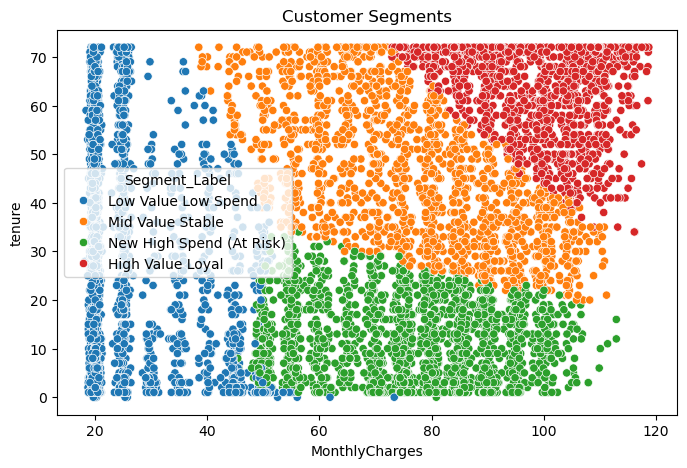

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='MonthlyCharges',
    y='tenure',
    hue='Segment_Label',
    data=segmentation_df,
    palette='tab10'
)
plt.title('Customer Segments')
plt.show()


In [26]:
data = data.merge(
    segmentation_df[['customerID', 'Segment_Label']],
    on='customerID',
    how='left'
)

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Segment_Label_x,Segment_Label_y
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Value Low Spend,Low Value Low Spend
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Mid Value Stable,Mid Value Stable
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New High Spend (At Risk),New High Spend (At Risk)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low Value Low Spend,Low Value Low Spend
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New High Spend (At Risk),New High Spend (At Risk)


In [27]:
# Save segmented data for next phases
data.to_csv(
    r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\data_processed_with_segments.csv",
    index=False
)


### Customer Segmentation Insights

1. **Low Value Low Spend**  
   Customers in this segment have low monthly charges, low lifetime value, and moderate tenure.  
   They contribute minimal revenue and show low engagement.

2. **High Value Loyal**  
   These customers have the highest tenure, highest monthly charges, and the strongest lifetime value.  
   They are the most profitable and stable segment.

3. **New High Spend (At Risk)**  
   These customers are new to the service but already spend a lot.  
   Their low tenure combined with high charges makes them a high‑risk, high‑priority group for retention.

4. **Mid Value Stable**  
   Customers in this segment show balanced behavior with mid‑to‑long tenure and moderate‑high spending.  
   They are reliable contributors with steady value.

These segments will be integrated into the churn prediction model  
and used to design targeted retention and engagement strategies.


In [28]:
data[['Segment_Label_x', 'Segment_Label_y']].head(10)


,Segment_Label_x,Segment_Label_y
0,Low Value Low Spend,Low Value Low Spend
1,Mid Value Stable,Mid Value Stable
2,New High Spend (At Risk),New High Spend (At Risk)
3,Low Value Low Spend,Low Value Low Spend
4,New High Spend (At Risk),New High Spend (At Risk)
5,New High Spend (At Risk),New High Spend (At Risk)
6,New High Spend (At Risk),New High Spend (At Risk)
7,Low Value Low Spend,Low Value Low Spend
8,Mid Value Stable,Mid Value Stable
9,Mid Value Stable,Mid Value Stable


In [29]:
data = data.drop(columns=['Segment_Label_x'])
data = data.rename(columns={'Segment_Label_y': 'Segment_Label'})
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Segment_Label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Value Low Spend
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Mid Value Stable
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New High Spend (At Risk)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low Value Low Spend
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New High Spend (At Risk)


In [30]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Segment_Label'],
      dtype='object')

In [31]:
data.to_csv(
    r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\data_final_for_modeling.csv",
    index=False
)
